In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import csv
import os.path
import datetime
import copy
from datetime import datetime
import matplotlib.pyplot as plt
import copy
import itertools

## Cloning the Git Repository

Check if the dataset is available on the dist: clone if it is not there, update if the clone version updated

In [2]:
cwd = os.getcwd()

if os.path.isdir('COVID-19'):
  ! git -C ./COVID-19 pull
else:
  !git clone https://github.com/CSSEGISandData/COVID-19.git

Already up to date.


## Create Output Directory and References
- Create a directory to save the new CSV files
- Create lookup arrays (e.g. filenames)

In [7]:
if not os.path.isdir('outputs'):
  !mkdir outputs
else:
  print('The \'outputs\' directory is already created.')


db_origin = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series'

output_path = 'outputs/'

files = ['time_series_19-covid-Confirmed.csv', 'time_series_19-covid-Recovered.csv', 'time_series_19-covid-Deaths.csv']

format_str = '%m/%d/%y'


#list for storage information
cum_data = []
daily_data = []
dates = []
locations = []
counts = 0
marker = itertools.cycle((',', '+', '.', 'o', '*'))

The 'outputs' directory is already created.


## Reading Files and Merge data
The reported total confirmed, recoverd, and death cases are presented in three seperate files per day. In the following, we are reading these three files and merge data to a new CSV file called "outputs.csv". In addition, the daily number of cases (i.e. the new cases in each day, which is the difference of the reported number day to day) is calculated and saved in "daily_outputs.csv".

In [0]:
with open(os.path.join(db_origin, files[0]), 'r') as file1, \
    open(os.path.join(db_origin, files[1]), 'r') as file2, \
      open(os.path.join(db_origin, files[2]), 'r') as file3, \
        open(os.path.join(output_path, 'outputs.csv'), 'w', newline = '') as output, \
          open(os.path.join(output_path, 'daily_outputs.csv'), 'w', newline = '') as output1:
    
    f1 = csv.reader(file1)
    f2 = csv.reader(file2)
    f3 = csv.reader(file3)

    writer = csv.writer(output)
    writer1 = csv.writer(output1)

    for line in zip(f1,f2,f3):
      counts += 1
      if counts == 1: 
        for i in range(len(line[0][4:])):
          dates.append(datetime.strptime(line[0][4+i], format_str))
        writer.writerow(['Date', 'Location', 'Province/State', 'Country', 'Lat', 'Long', 'Total Confirmed', 'Total Recovered', 'Total Death'])
        writer1.writerow(['Date', 'Location', 'Province/State', 'Country', 'Lat', 'Long', 'Daily New Confirmed', 'Daily New Recovered', 'Daily New Death'])
      else:
        loc = '%s-%s' % (line[0][1], line[0][0]) if line[0][0] != '' else line[0] [1]
        locations.append(loc)
        for i in range(len(dates)):
          cum_data.append( [dates[i].strftime("%Y-%m-%d"), loc, line[0][0], line[0][1],line[0][2],line[0][3],line[0][4+i],line[1][4+i],line[2][4+i]])

        for i in range(1, len(dates)):
          daily_data.append( [dates[i].strftime("%Y-%m-%d"), loc, line[0][0], line[0][1], line[0][2],line[0][3],int(line[0][4+i]) - int(line[0][3+i]),int(line[1][4+i])-int(line[1][3+i]),int(line[2][4+i])-int(line[2][3+i])])
    
    writer.writerows(cum_data)
    writer1.writerows(daily_data)
  

In [9]:
cum_data = pd.read_csv(os.path.join(output_path, 'outputs.csv'))

N_death = 100

N_death_date = {}

for loc in locations:
  timeline = cum_data.loc[ (cum_data['Location'] == loc) & (cum_data['Total Death'] > N_death)]['Date']

  if len(timeline) != 0:
    N_death_date.update( {loc: min(timeline)} )
  
print('Date for each countries past %d Deaths' % N_death)
for k, v in N_death_date.items():
  print('%s: %s' % (k,v))


Date for each countries past 100 Deaths
Italy: 2020-03-04
Spain: 2020-03-13
China-Hubei: 2020-01-28
Iran: 2020-03-05
Korea, South: 2020-03-21
France-France: 2020-03-16
United Kingdom-United Kingdom: 2020-03-19
Netherlands-Netherlands: 2020-03-20


In [85]:
daily_data = pd.read_csv(os.path.join(output_path, 'daily_outputs.csv'))

cum_data = pd.read_csv(os.path.join(output_path, 'outputs.csv'))


confirmed_date = {}

updated_case = {}

N_confirmedCase = 500

for loc in locations:
  timeline = daily_data.loc[ (daily_data['Location'] == loc ) & (daily_data['Daily New Confirmed'] > N_confirmedCase)]['Date']
  case = cum_data.loc[ (cum_data['Location'] == loc)]['Total Confirmed']
  if len(timeline) != 0:
    confirmed_date.update( {loc: [min(timeline), max(case)]} )

print('Date Countries past %d Confirmed Cases' % N_confirmedCase)

for k, v in confirmed_date.items():
  print('%s: %s' % (k,v[0]))
  




Date Countries past 500 Confirmed Cases
Germany: 2020-03-13
Italy: 2020-03-01
Spain: 2020-03-10
Belgium: 2020-03-21
Switzerland: 2020-03-15
US-New York: 2020-03-17
China-Hubei: 2020-01-28
Iran: 2020-03-02
Korea, South: 2020-02-27
France-France: 2020-03-10
United Kingdom-United Kingdom: 2020-03-18
Netherlands-Netherlands: 2020-03-20


In [51]:
sorted_date = sorted(confirmed_date.items(), key=lambda p: p[1], reverse=False)



[('China-Hubei', ['2020-01-28', 67800]), ('Korea, South', ['2020-02-27', 8799]), ('Italy', ['2020-03-01', 53578]), ('Iran', ['2020-03-02', 20610]), ('France-France', ['2020-03-10', 14282]), ('Spain', ['2020-03-10', 25374]), ('Germany', ['2020-03-13', 22213]), ('Switzerland', ['2020-03-15', 6575]), ('US-New York', ['2020-03-17', 11710]), ('United Kingdom-United Kingdom', ['2020-03-18', 5018]), ('Netherlands-Netherlands', ['2020-03-20', 3631]), ('Belgium', ['2020-03-21', 2815])]


# ScatterPlot
- Aim to visualize the date of each countries past 500 confirmed cases and total confirmed cases so far.


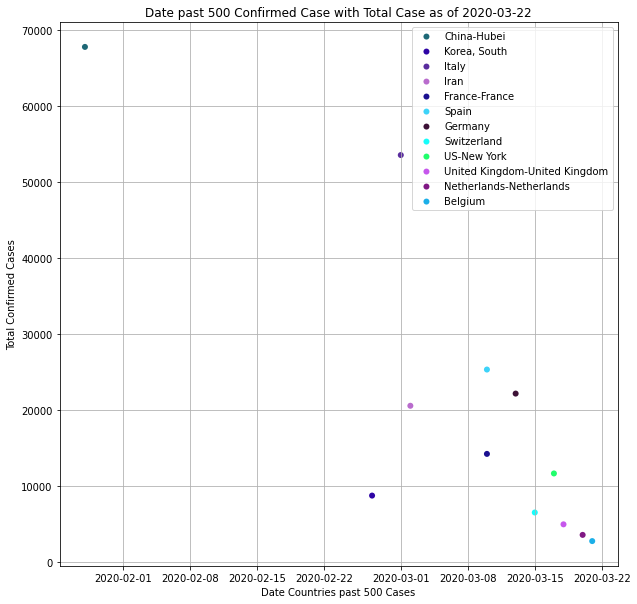

In [87]:
import numpy as np
import matplotlib.dates as mdates


fig, ax = plt.subplots(figsize = (10,10))

dateList = []
countries = []
casesList = []

colors = []

for e in sorted_date:

  countries.append(e[0])
  dateList.append(e[1][0])
  casesList.append(e[1][1])

for country, date, case in zip(countries, dateList, casesList):
  d = datetime.strptime(date, '%Y-%m-%d').date()

  r, g, b = (int(255*x) for x in np.random.rand(3,))
  hexa = "#%02x%02x%02x" %(r, g, b)

  ax.scatter(d, case, c = hexa, edgecolors='none', label=country )


plt.grid(True)

now = datetime.now()
plt.title("Date past %d Confirmed Case with Total Case as of %s" %(N_confirmedCase, now.strftime("%Y-%m-%d") ))
plt.xlabel("Date Countries past %d Cases"% N_confirmedCase)
plt.ylabel("Total Confirmed Cases")

plt.legend(loc=1)
plt.show()
  




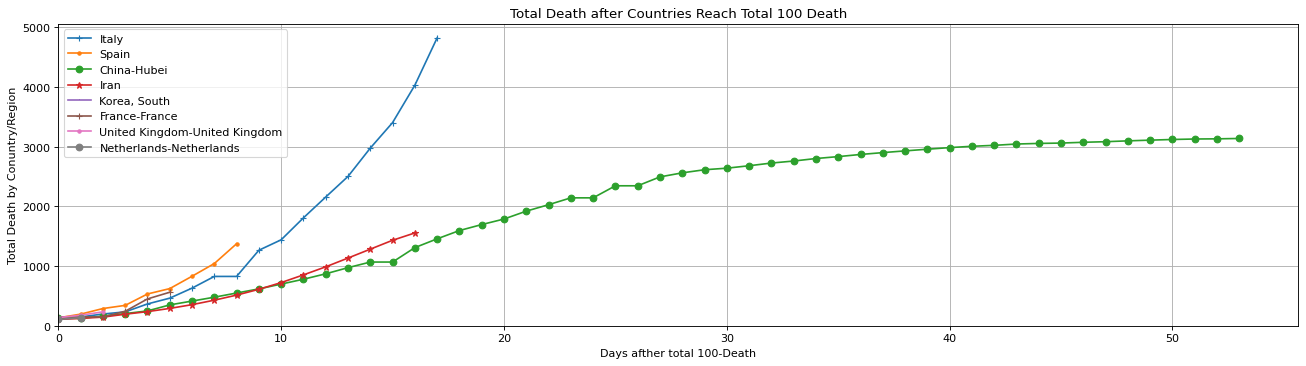

In [22]:
fig = plt.figure(figsize= (20,5), dpi = 80, facecolor='w', edgecolor='k')

tbl_N_death = pd.DataFrame(columns = cum_data.columns )


for loc, date in N_death_date.items():
  # make a copy of each location and the data for the same date or larger date after the set deaths
  tbl_tmp = copy.deepcopy( cum_data.loc[(cum_data['Location']==loc) & (cum_data['Date'] >= date)] )
  
  for index, row in tbl_tmp.iterrows():
    #  get the num of days
    tbl_tmp.loc[index, 'Date'] = (datetime.strptime(row['Date'], "%Y-%m-%d") - datetime.strptime(date, "%Y-%m-%d")).days 

  plt.plot( 'Date', 'Total Death', marker = next(marker), data = tbl_tmp, label=loc)
  tbl_N_death = tbl_N_death.append(tbl_tmp)


plt.legend()

plt.gca().set_xlim(left=0)

plt.gca().set_ylim(bottom=0)

plt.grid(True)

plt.title("Total Death after Countries Reach Total %d Death"%N_death)
plt.xlabel("Days afther total %d-Death"%N_death)
plt.ylabel("Total Death by Conuntry/Region")
plt.show()






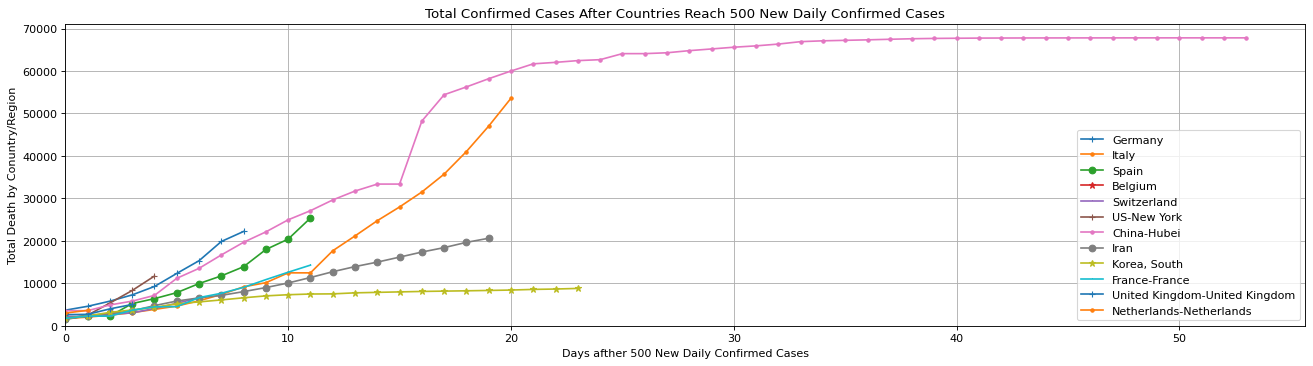

In [28]:
day = ['Day%d' % i for i in range(100)]


fig=plt.figure(figsize=(20, 5), dpi= 80, facecolor='w', edgecolor='k')


tbl_N_confirmed = pd.DataFrame(columns = cum_data.columns)
for loc, date in confirmed_date.items():
  tbl_tmp = copy.deepcopy(cum_data.loc[(cum_data['Location'] == loc) & (cum_data['Date']>=date)])
  
  for index, row in tbl_tmp.iterrows():
    tbl_tmp.loc[index, 'Date'] = (datetime.strptime(row['Date'], "%Y-%m-%d") - datetime.strptime(date, "%Y-%m-%d")).days
  
  plt.plot('Date','Total Confirmed',marker=next(marker), data=tbl_tmp,label=loc)
  tbl_N_confirmed = tbl_N_confirmed.append(tbl_tmp)


plt.legend()
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(bottom=0)
plt.grid(True)

plt.title("Total Confirmed Cases After Countries Reach %d New Daily Confirmed Cases" % N_confirmedCase)
plt.xlabel("Days afther %d New Daily Confirmed Cases" % N_confirmedCase)
plt.ylabel("Total Death by Conuntry/Region")
plt.show()